In [1]:
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
from utils import camb_clfile
import numpy as np
import healpy as hp

In [2]:
cl_unl = camb_clfile("/global/cscratch1/sd/lonappan/S4BIRD/CAMB/BBSims_lenspotential.dat")

In [3]:
%load_ext autoreload
%autoreload 2
import quest 

In [4]:
clpp1 = quest.RecoBase.from_ini('../litebird.ini')
clpp2 = quest.RecoBase.from_ini('../litebirdFG1.ini')

An extra Mask is applied to data. Previous fsky is 0.80 and new fsky = 0.70


In [16]:
st1 = clpp1.get_qcl_stat(100)
st2 = clpp2.get_qcl_stat(100)

qcl stat: 100%|██████████| 100/100 [00:15<00:00,  6.64simulation/s]


<ErrorbarContainer object of 3 artists>

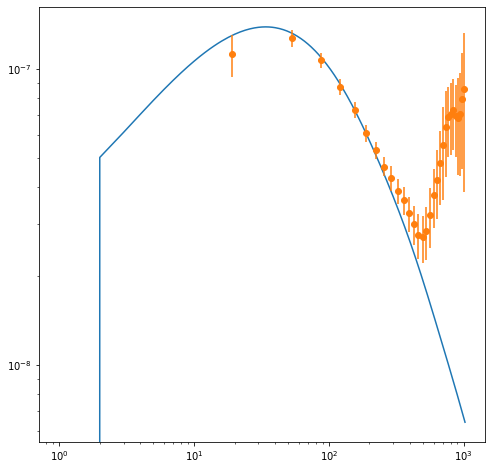

In [20]:
plt.figure(figsize=(8,8))
#plt.loglog(clpp1.L, clpp1.Lfac*(clpp1.cl_unl['pp'][:clpp1.Lmax+1]))
#plt.errorbar(clpp1.B, (st1.mean(axis=0)),yerr=st1.std(axis=0),fmt='o')
plt.loglog(clpp2.L, clpp2.Lfac*(clpp2.cl_unl['pp'][:clpp2.Lmax+1]))
plt.errorbar(clpp2.B, (st2.mean(axis=0)),yerr=st2.std(axis=0),fmt='o')

In [7]:
#plt.loglog(clpp2.L, clpp2.Lfac*(clpp2.cl_unl['pp'][:clpp2.Lmax+1]))
#plt.errorbar(clpp2.B, clpp2.Bfac*(st2.mean(axis=0)),yerr=clpp2.Bfac*st2.std(axis=0),fmt='o')

In [21]:
clpp2.SNR_phi(100)

qcl stat: 100%|██████████| 100/100 [00:12<00:00,  7.74simulation/s]


28.76543608857978

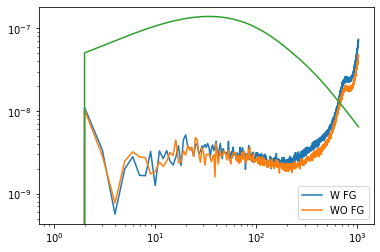

In [33]:
plt.loglog(clpp2.L,clpp2.Lfac*clpp2.mean_field_cl(),label='W FG')
plt.loglog(clpp2.L,clpp2.Lfac*clpp1.mean_field_cl(),label='WO FG')
plt.loglog(clpp2.L,clpp2.Lfac*clpp2.cl_unl['pp'][:clpp2.Lmax+1])
#plt.loglog(clpp2.L,clpp1.Lfac*clpp2.norm)
plt.legend()

0.7990690867106119

Maps with FG


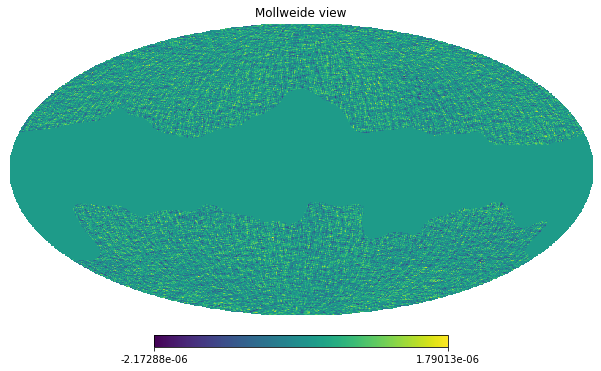

In [36]:
hp.mollview(clpp2.get_sim(0)[0][0])